In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Dataset

In [2]:
df = pd.read_csv('data_assignment2 (1).csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Data cleaning and wrangling

In [3]:
#missing values in the dataset
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


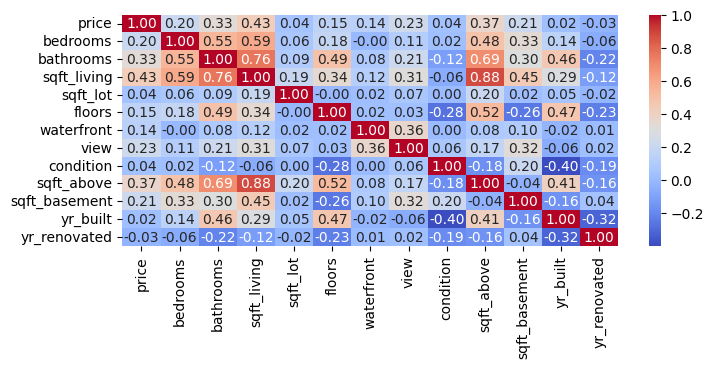

In [4]:
numeric_data = df.select_dtypes(include=[float, int])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 3))

#heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Exploratory Data Analysis

visualization of feature values individually

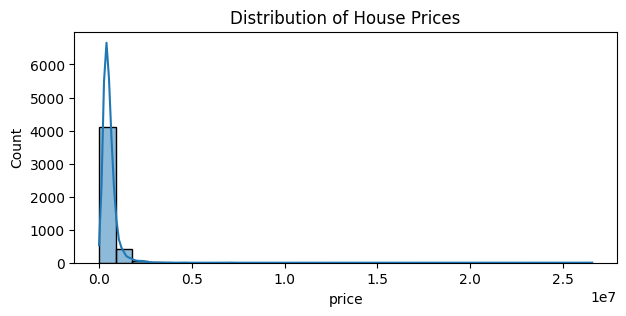

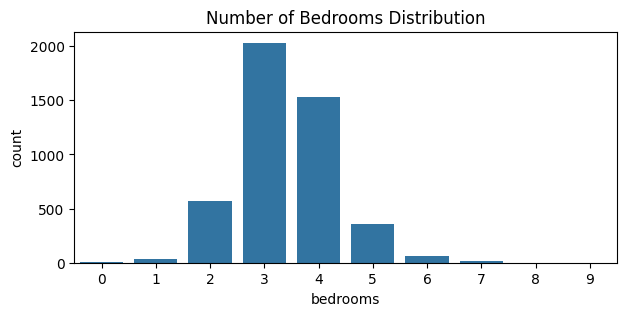

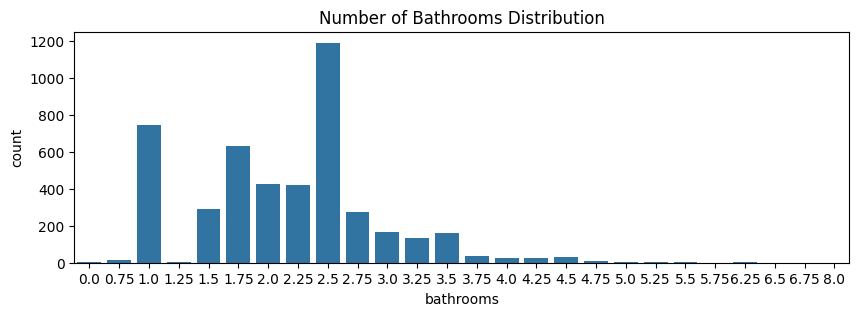

In [5]:
# Distribution of prices
plt.figure(figsize=(7, 3))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Distribution of bedrooms and bathrooms
plt.figure(figsize=(7, 3))
sns.countplot(x='bedrooms', data=df)
plt.title('Number of Bedrooms Distribution')
plt.show()

plt.figure(figsize=(10, 3))
sns.countplot(x='bathrooms', data=df)
plt.title('Number of Bathrooms Distribution')
plt.show()

Relationship between features values visualization

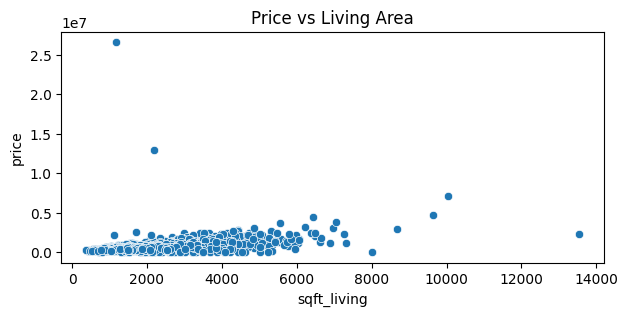

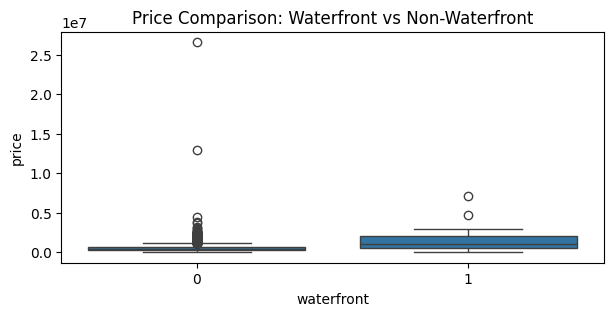

In [6]:
# Scatterplot of Price vs Living Area
plt.figure(figsize=(7, 3))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Living Area')
plt.show()

# Boxplot of Price for Waterfront vs Non-Waterfront Properties
plt.figure(figsize=(7, 3))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Comparison: Waterfront vs Non-Waterfront')
plt.show()

Data splitting

In [7]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'yr_built']]
y = df['condition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

Training data shape:  (3680, 6)
Testing data shape:  (920, 6)


Regression modal

In [8]:
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Evaluating

In [9]:
# Evaluate the model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R²:", r2_train)
print("Test R²:", r2_test)

Train MSE: 0.3746675887470429
Test MSE: 0.3697900083188406
Train R²: 0.17839322721947493
Test R²: 0.21076852093655007


User requriment example

In [10]:
new_house = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [1800],
    'floors': [1],
    'view': [0],
    'yr_built': [1995]
})

predicted_condition = model.predict(new_house)
print("Predicted Condition of the New House:", predicted_condition)

Predicted Condition of the New House: [3.31539325]


# Explaination

1. The dataset is read into a pandas DataFrame. Rows with missing values (NaN) are removed.

2. The target variable (house condition) is selected, and several columns like bedrooms, bathrooms, living area (sqft), floors, etc., are chosen as input features.

3. The data is split into training and testing sets, with 80% used for training the model and 20% for testing its accuracy.

4. linear regression model is set up to predict the house condition using the selected features.

5. The model is trained using the training data (X_train, y_train) to learn the patterns in the data.

6. The mean squared error (MSE) is calculated for both the training and testing sets to check how well the model predicts the house condition.

7. Evaluating the Model (R² Score) is computed to measure how much of the variance in the house condition the model

8. The trained model is used to predict the condition of a new house based on user requriment.